# 最好结果：svm 96.00%

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import colors
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
import openpyxl 

In [7]:
data=pd.read_excel("训练集.xlsx",sheet_name="training",header=None)
data=data.drop([0])
data=data.dropna(how="any")
x=np.array(data[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]])
y=pd.factorize(data[17])[0]

In [8]:
kf=KFold(n_splits=5,shuffle=True,random_state=2022)
for train_index,test_index in kf.split(x):
    x_train,X_test =x[train_index],x[test_index]

In [9]:
from sklearn.linear_model import LogisticRegression
score_lst=[]
for train_index,test_index in kf.split(x):
    X_train,X_test=x[train_index],x[test_index]
    Y_train,Y_test=y[train_index],y[test_index]
    model=LogisticRegression(solver='liblinear').fit(X_train,Y_train)
    score_lst.append(model.score(X_test,Y_test))
score_ave=sum(score_lst)/len(score_lst)
print("acc:{:.4f}",format(score_ave))

acc:{:.4f} 0.8552380952380952


# 决策树结果：83.62%

In [10]:
from sklearn.tree import DecisionTreeClassifier

score_lst=[]
for train_index,test_index in kf.split(x):
    X_train,X_test=x[train_index],x[test_index]
    Y_train,Y_test=y[train_index],y[test_index]

    model=DecisionTreeClassifier().fit(X_train,Y_train)
    score_lst.append(model.score(X_test,Y_test))

score_ave=sum(score_lst)/len(score_lst)
print("acc:{:.4f}".format(score_ave))

acc:0.8362


# svm结果：85.57%

In [11]:
from sklearn import svm

score_lst=[]
for train_index,test_index in kf.split(x):
    X_train,X_test=x[train_index],x[test_index]
    Y_train,Y_test=y[train_index],y[test_index]

    model=svm.SVC(kernel="linear",C=1).fit(X_train,Y_train)
    score_lst.append(model.score(X_test,Y_test))

score_ave=sum(score_lst)/len(score_lst)
print("acc:{:.4f}".format(score_ave))

acc:0.8557


# 随机树结果：88.43%

In [12]:
from sklearn.ensemble import RandomForestClassifier

score_lst=[]
for train_index,test_index in kf.split(x):
    X_train,X_test=x[train_index],x[test_index]
    Y_train,Y_test=y[train_index],y[test_index]

    model=RandomForestClassifier().fit(X_train,Y_train)
    score_lst.append(model.score(X_test,Y_test))

score_ave=sum(score_lst)/len(score_lst)
print("acc:{:.4f}".format(score_ave))

acc:0.8748


# 结果 ：96.00%

In [14]:
data=pd.read_excel(r"测试集.xlsx",header=None)
data=data.drop([0])
x=np.array(data[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]])
y=pd.factorize(data[17])[0]
model=RandomForestClassifier(criterion="entropy",max_depth=3,oob_score=True,).fit(x,y)
score_lst =[model.score(x,y)]
print(score_lst)


[0.96]


# knn模型结果：93.33%

In [15]:
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import math
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


iris = load_iris() 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.20, random_state=27)

In [16]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [18]:
class myKNN():
    def __init__(self,K):
        self.K=K
        self._x_train=None
        self._y_train=None
    
    def fit(self,X_train,Y_train):
        self._x_train=X_train
        self._y_train=Y_train
        return self
    def _predict(self,x):
        d = [math.sqrt(np.sum((x-X_train[i])**2)) for i in range(len(X_train))]
        near = np.argsort(d)        
        top_k = [y_train[i] for i in near[0:self.K]]
        votes = Counter(top_k)
        pre = votes.most_common(1)[0][0]
        return pre
    def predict(self,X_pre):
        y_pre=[self._predict(x) for x in X_pre]
        return np.array(y_pre)
    def accuracy(self,y_pre,y_test):
        return sum(y_pre==y_test)/len(y_test)

/var/folders/m2/d2ss5qs14td7nl2zttr50zf40000gn/T/ipykernel_29151/380092149.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found

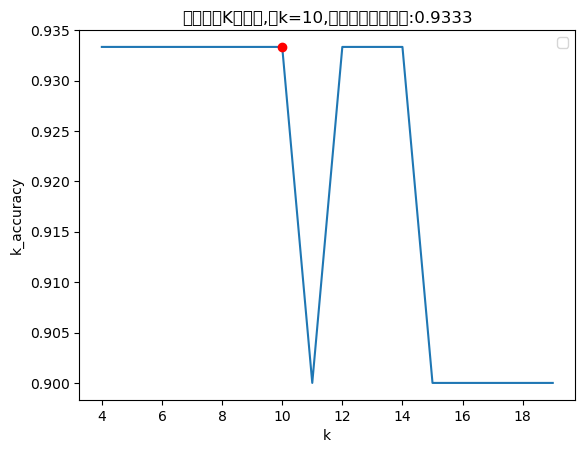

In [19]:
def get_best_k():
    acc=[]
    for k in range(4,20):
        sknn = myKNN(k)
        sknn.fit(X_train,y_train)
        y_p = sknn.predict(X_test)
        acc.append(sknn.accuracy(y_p,y_test))

    xt = range(4,20)
    yt = acc
    xmax = np.argsort(yt)[-1]
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    plt.plot(xt,yt, lw = 1.5)
    plt.plot(xmax,max(yt),'ro')

    plt.xlabel("k")
    plt.ylabel("k_accuracy")
    plt.title('精确率随K的变化,当k=%d,精确率达到最大值:%.4f'%(xmax,max(yt)))


    plt.legend()
    plt.show()

get_best_k()
